In [58]:
# Rajeev Choudhari
# 11/1/2024
# Project 3
# ITCS 3162

In [59]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# reading the dataset
data = pd.read_csv('nasdaq.csv')
data.shape

(3914, 13)

In [61]:
# Data Information, looking for any null values.
data_info = pd.DataFrame({
    'Data Type': data.dtypes,
    'Null Count': data.isnull().sum(),
    'Non-Null Count': data.notnull().sum()
})
data_info

,Data Type,Null Count,Non-Null Count
Date,object,0,3914
Open,float64,0,3914
High,float64,0,3914
Low,float64,0,3914
Close,float64,0,3914
Volume,float64,0,3914
InterestRate,float64,0,3914
ExchangeRate,float64,0,3914
VIX,float64,0,3914
TEDSpread,float64,0,3914


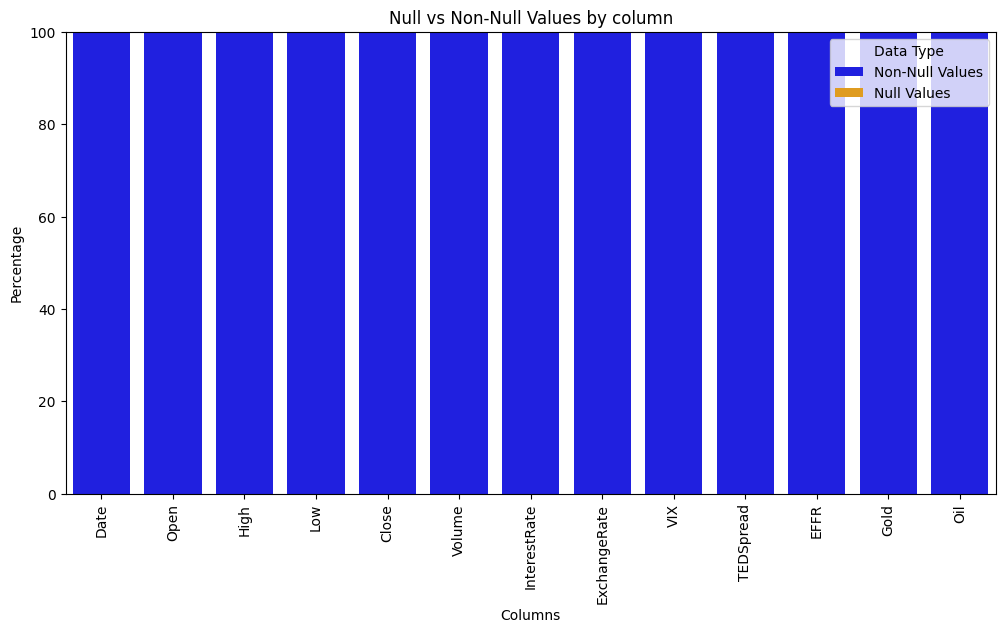

In [62]:
total_rows = len(data)

data_info['Null Percentage'] = data_info['Null Count'] / total_rows * 100
data_info['Non-Null Percentage'] = data_info['Non-Null Count'] / total_rows * 100
plt.figure(figsize=(12, 6))
bottom = sns.barplot(
    x=data_info.index, y='Non-Null Percentage', data=data_info, color='blue', label='Non-Null Values'
)
top = sns.barplot(
    x=data_info.index, y='Null Percentage', data=data_info, color='orange', bottom=data_info['Non-Null Percentage'], label='Null Values'
)
plt.xticks(rotation=90)
plt.title('Null vs Non-Null Values by column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend(title='Data Type')
plt.ylim(0, 100)
plt.tight_layout
plt.show()


In [63]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR']])

In [64]:
# Training the model
X = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR'])
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
# testing the model on the training set
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_train_pred_rf = random_forest.predict(X_train)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

In [66]:
print("Linear Regression Training Set Performance:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

print("\nRandom Forest Set Performance:")
print(f"Mean Squared Error: {train_mse_rf}")
print(f"R-squared: {train_r2_rf}")

Linear Regression Training Set Performance:
Mean Squared Error: 0.03751887924011341
R-squared: 0.9999022914614052

Random Forest Set Performance:
Mean Squared Error: 0.009620008971699625
R-squared: 0.999974947092319


In [67]:
# testing the model on the test set
y_test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_test_pred_rf = random_forest.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

In [68]:
print("\nLinear Regression Test Set Performance:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

print("\nRandom Forest Set Performance:")
print(f"Mean Squared Error: {test_mse_rf}")
print(f"R-squared: {test_r2_rf}")


Linear Regression Test Set Performance:
Mean Squared Error: 0.037129347828957236
R-squared: 0.9999066092679292

Random Forest Set Performance:
Mean Squared Error: 0.06825260369907123
R-squared: 0.9998283255430568


In [69]:
results_test_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
    })
results_train_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred
    })

results_test_df2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_rf
    })
results_train_df2 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred_rf
    })

In [70]:
results_test_df['Set'] = 'Test'
results_train_df['Set'] = 'Train'
results_combined_df = pd.concat([results_train_df, results_test_df])

results_test_df2['Set'] = 'Test'
results_train_df2['Set'] = 'Train'
results_combined_df2 = pd.concat([results_train_df2, results_test_df2])

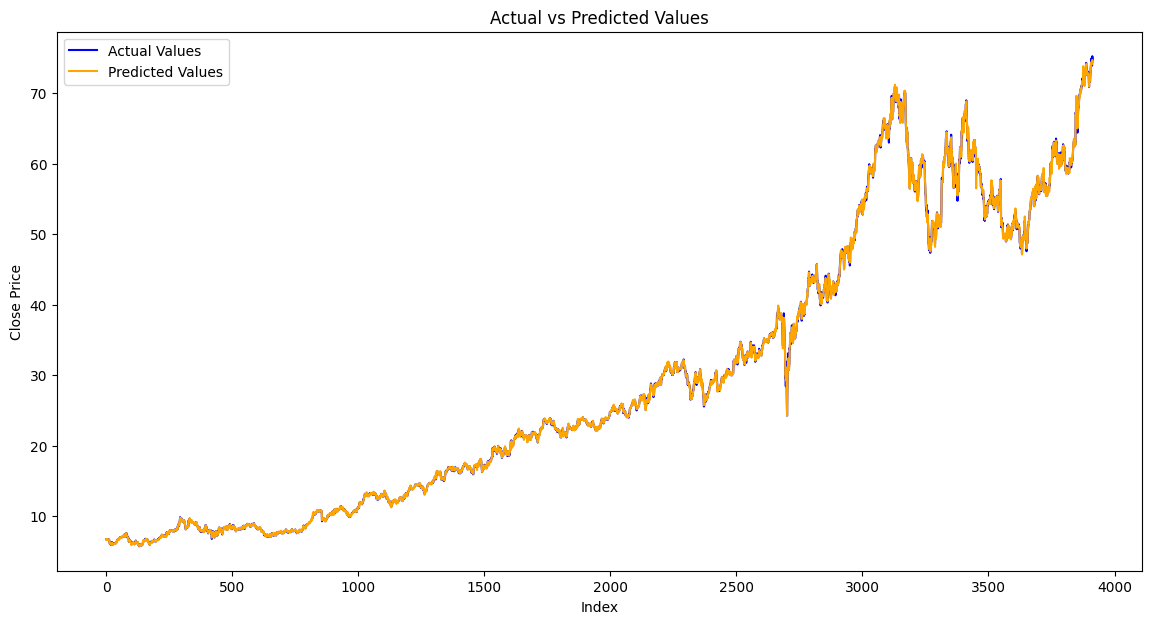

In [71]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results_combined_df, x=results_combined_df.index, y='Actual', label='Actual Values', color='blue')
sns.lineplot(data=results_combined_df, x=results_combined_df.index, y='Predicted', label='Predicted Values', color='orange')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


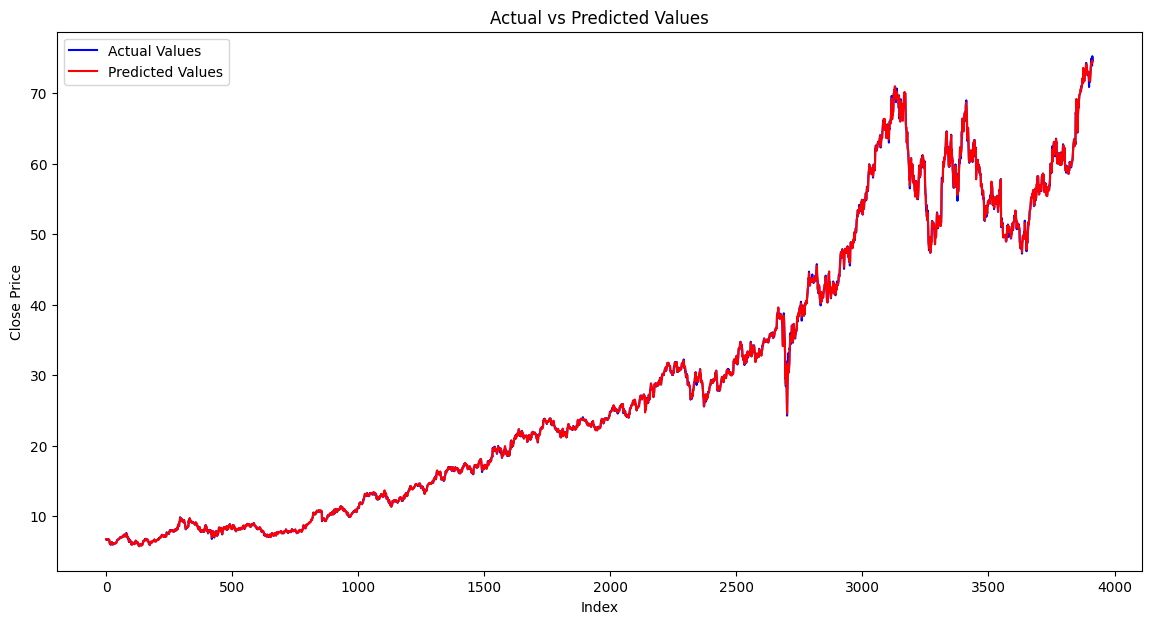

In [72]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results_combined_df2, x=results_combined_df2.index, y='Actual', label='Actual Values', color='blue')
sns.lineplot(data=results_combined_df2, x=results_combined_df2.index, y='Predicted', label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


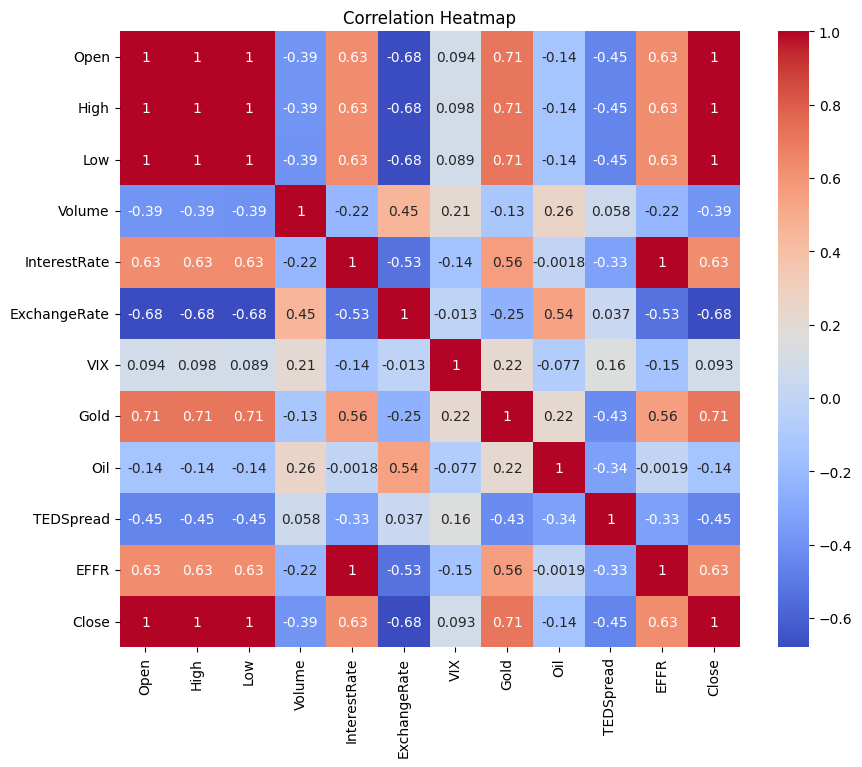

In [73]:
plt.figure(figsize=(10, 8))
corr = data[['Open', 'High', 'Low', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil', 'TEDSpread', 'EFFR', 'Close']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()